In [ ]:
#@title Version 1.2 <br> 2nd training of the model

### imports and mounting drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir dataset
!ls

dataset  drive	sample_data


### Copy dataset

In [ ]:

!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_2.csv' /content/dataset/
! echo copied final_dataset_2


copied final_dataset_2


In [ ]:
data = pd.read_csv('/content/dataset/final_dataset_2.csv')
data

,Language,Source
0,bash,#!/usr/bin/bash\nRES=1\n\nif [ $RES -eq 0 ]\nt...
1,bash,g++ -o ex_addinst ./ex_addinst.o -L/home/li/w...
2,bash,"amazon\n<bookstore>\n<book>\n <title lang=""en..."
3,bash,I/A/dataA.dat\nI/B/dataB.dat\nI/C/dataC.dat\n\...
4,bash,my_script pack name.tar file1 file2\n
...,...,...
29995,swift,"Class ViewController: UIViewController, UITabl..."
29996,swift,if let type = json.type {\n\n } else {...
29997,swift,// Create path.\n NSArray *paths = NSSearchP...
29998,swift,class AddPersonViewController: UIViewControlle...


#### describing dataset

Text(0.5, 1.0, 'Dataset')

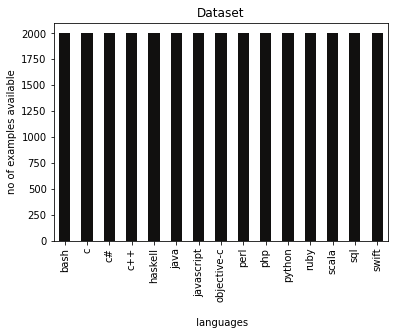

In [ ]:
data.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

### PREPROCESSING OF DATASET USING REGULAR EXPRESSION AND NLTK

In [ ]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
print('.....done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
.....done


In [ ]:
stopwords_list = stopwords.words('english')
print(len(stopwords_list))
stopwords_list.extend(['left','right','up','down','center','centre'])
print(len(stopwords_list))
stopwords_list.extend(['bottom','start','end','price','location','fix','here'])
print(len(stopwords_list))


179
185
192


### function to clean data

In [ ]:
def expression1(text):
    # remove single character

    #removing url 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'^https?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^www?://.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # text = re.sub('{','',text)
    # text = re.sub('}','',text)
    
    # to remove '(' , ' )' , '[' , ']' ... replaced with a space 
    # text = re.sub('\\(',' ',text)
    # text = re.sub('\\)',' ',text)
    # text = re.sub('\\[',' ',text)
    # text = re.sub('\\]',' ',text)
    # replace . with a space
    # text = re.sub('\\.',' ',text)
    
    # remove unicode
    
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    
    # remove digits
    text = re.sub('[0-9]',' ',text)
    
    #     remove + - * / < >
    text = re.sub('\\+',' ',text)
    text = re.sub('\\=',' ',text)
    text = re.sub('\\-',' ',text)
    text = re.sub('\\*',' ',text)
    text = re.sub('\\/',' ',text)
    # text = re.sub('\\<',' ',text)
    # text = re.sub('\\>',' ',text)
#     text = re.sub('\\:',' ',text)
    
#     text = text.replace(':',r' : ')
    
    
    #     text = ' '.join(text.split())

    # replace single chars again 
    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # spacing quoted statement
    text = re.sub('"',' " ',text)
    # replace url

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        #Replaces url address with "url" 
    # text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
	  # text = re.sub(r'#([^\s]+)', r'\1',text)

    return text

# def replaceURL(text):

def clean_code(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)

print("TRY expresion1")

TRY expresion1


In [ ]:
%%time

line_7210 = data.iloc[15710]['Source']
cleaned_7210 =  clean_code(line_7210)

print(line_7210 , '\n ->',len(line_7210))
print('-'*60,'\n\n')
print(cleaned_7210,'\n ->',len(cleaned_7210))


@implementation ClassA

-(void)launchSomething
{
   ClassB *classB = [[ClassB alloc] init];
   [classB setCallback:self withSelector:@selector(deferredWork)];

   // do some other stuff, assign class B to some View and eventually release class B
}

-(void)deferredWork
{
   NSLog(@"this is the method that will be deferred till some point in time");
}

@interface ClassB

id targetObject;
SEL targetMethod;

-(void) setCallback:(id)anObject withSelector:(SEL)aMethod

@implementation ClassB
-(void) setCallback:(id)anObject withSelector:(SEL)aMethod
{
   // QUESTION: Do I need to add a 'retain' here on the targetObject?
   targetObject = anObject;
   targetMethod = aMethod;
}

-(void) someWorkLater
{
    if ( [targetObject respondsToSelector:@selector(targetMethod)] ) {
        // invoke the target object with the specific method
        [targetObject targetMethod];
    }
}

 
 -> 882
------------------------------------------------------------ 


@ implementation ClassA ( void ) launchSomet

#### Cleaning dataset

In [ ]:
%%time

dataset_refined = data.copy()
print('->created a copy')
dataset_refined['Source'] =  dataset_refined['Source'].astype(str)
print('\n->as string')
dataset_refined['Source'] =  dataset_refined['Source'].apply(clean_code)
print('\n->cleaned code with expression1')
dataset_refined.to_csv('dataset/cleaned_data_2_v2.csv',index=None)
print('\n->saved cleaned csv , columns : ',dataset_refined.columns)

print('done')

->created a copy

->as string

->cleaned code with expression1

->saved cleaned csv , columns :  Index(['Language', 'Source'], dtype='object')
done
CPU times: user 23.2 s, sys: 17.5 ms, total: 23.2 s
Wall time: 23.2 s


In [ ]:
df = pd.read_csv('/content/dataset/cleaned_data_2_v2.csv')
df

,Language,Source
0,bash,# ! usr bin bash RES $ RES eq echo `` Finishin...
1,bash,ex_addinst ex_addinst.o home li work tools lin...
2,bash,amazon < bookstore > < book > < title lang `` ...
3,bash,dataA.dat dataB.dat dataC.dat II dataA.dat II ...
4,bash,my_script pack name.tar file file
...,...,...
29995,swift,"Class ViewController : UIViewController , UITa..."
29996,swift,let type json.type else XCTFail ( `` There typ...
29997,swift,Create path . NSArray paths NSSearchPathForDir...
29998,swift,class AddPersonViewController : UIViewControll...


In [ ]:
%%time

df["lang_id"] = df['Language'].factorize()[0]
print('>>> lang id created')
lang_id_df = df[['Language', 'lang_id']].drop_duplicates().sort_values('lang_id')
print('>>> added to dataframe')
lang_to_id = dict(lang_id_df.values)
id_to_lang = dict(lang_id_df[['lang_id', 'Language']].values)
print('>>> now columns : ',df.columns)

>>> lang id created
>>> added to dataframe
>>> now columns :  Index(['Language', 'Source', 'lang_id'], dtype='object')
CPU times: user 10.6 ms, sys: 934 µs, total: 11.6 ms
Wall time: 12.6 ms


In [ ]:
df

,Language,Source,lang_id
0,bash,# ! usr bin bash RES $ RES eq echo `` Finishin...,0
1,bash,ex_addinst ex_addinst.o home li work tools lin...,0
2,bash,amazon < bookstore > < book > < title lang `` ...,0
3,bash,dataA.dat dataB.dat dataC.dat II dataA.dat II ...,0
4,bash,my_script pack name.tar file file,0
...,...,...,...
29995,swift,"Class ViewController : UIViewController , UITa...",14
29996,swift,let type json.type else XCTFail ( `` There typ...,14
29997,swift,Create path . NSArray paths NSSearchPathForDir...,14
29998,swift,class AddPersonViewController : UIViewControll...,14


### copying tokenizer for converting sentences to sequences

In [ ]:
!cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/tokenizer_model1_run2.pickle' '/content/dataset'
!echo done

done


In [ ]:
%%time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

vocab_size = 10000
trunc_type='post'
oov_tok = "<OOV>"

print('loading pickle')
# loading
with open('/content/dataset/tokenizer_model1_run2.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print('loaded',type(tokenizer))

loading pickle
loaded <class 'keras_preprocessing.text.Tokenizer'>
CPU times: user 1.19 s, sys: 136 ms, total: 1.33 s
Wall time: 1.33 s


In [ ]:
tokenizer

In [ ]:
word_index = tokenizer.word_index
print('len of word index',len(word_index)) # should be 80436

len of word index 80436


### transform sentences using tokenizer

In [ ]:
max_length = 1000
trunc_type='post'

In [ ]:
%%time
print('converting whole data')
X = tokenizer.texts_to_sequences(df['Source'].values.astype('U'))
print(' .... converted text to sequences' , type(X),'\n ')
print('-'*70)

converting whole data
 .... converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
CPU times: user 4.45 s, sys: 28.8 ms, total: 4.48 s
Wall time: 4.48 s


### pad sequences

In [ ]:
%%time
X_padded = pad_sequences(X,maxlen=max_length, truncating=trunc_type)
print('sequence padded')
print(type(X_padded),'\n padded to ',X_padded.shape)

sequence padded
<class 'numpy.ndarray'> 
 padded to  (30000, 1000)
CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 249 ms


### Creating labels

In [ ]:
Y = pd.get_dummies(df['Language'].values.astype('U'))
print('and Y : ',type(Y))
y = np.asarray(Y)
print(X_padded.shape , y.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(30000, 1000) (30000, 15)


#### Train Test Split <br> this time using sklearn.model_selection train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split( X_padded, y, test_size=0.33, random_state=42)

print('training data : ',X_train.shape , ' ... ', y_train.shape)
print('testing data : ',X_test.shape , ' ... ', y_test.shape)

training data :  (20100, 1000)  ...  (20100, 15)
testing data :  (9900, 1000)  ...  (9900, 15)
CPU times: user 39.2 ms, sys: 1.89 ms, total: 41.1 ms
Wall time: 43.3 ms


### Copy model

In [ ]:
!cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/final_DLModel1_run2.zip' '/content/dataset'
!echo copied

copied


### unzip

In [ ]:
!unzip '/content/dataset/final_DLModel1_run2.zip'

Archive:  /content/dataset/final_DLModel1_run2.zip
   creating: content/content/final_DLModel1_run2/
  inflating: content/content/final_DLModel1_run2/saved_model.pb  
   creating: content/content/final_DLModel1_run2/assets/
   creating: content/content/final_DLModel1_run2/variables/
  inflating: content/content/final_DLModel1_run2/variables/variables.index  
  inflating: content/content/final_DLModel1_run2/variables/variables.data-00000-of-00001  


In [ ]:
model_path = '/content/content/content/final_DLModel1_run2'


### Loading the model

In [ ]:
%%time

from keras.models import load_model

model = load_model(model_path)
print('loaded')

loaded
CPU times: user 1.45 s, sys: 356 ms, total: 1.81 s
Wall time: 6.45 s


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
from sklearn.model_selection import KFold

# n_fold = 2
# n_fold = 3 
# n_fold = 5
n_fold = 10

k_fold = KFold(n_fold,shuffle=True,random_state=31)

In [ ]:
k_fold

KFold(n_splits=10, random_state=31, shuffle=True)

### Training the model

In [ ]:
%%time

scores = []
histories = []
print('......... fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train[train_iX] , y_train[train_iX] , X_train[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = model.fit(x_itrain,y_itrain,batch_size=64,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = model.evaluate(X_test , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores.append(acc)
  histories.append(history)

print('done')

......... fitting the model

Epoch 1/10
283/283 [==============================] - 14s 23ms/step - loss: 2.3793 - accuracy: 0.6193 - val_loss: 2.3437 - val_accuracy: 0.7040
Epoch 2/10
283/283 [==============================] - 6s 22ms/step - loss: 2.3774 - accuracy: 0.6175 - val_loss: 2.3426 - val_accuracy: 0.7095
Epoch 3/10
283/283 [==============================] - 5s 19ms/step - loss: 2.3773 - accuracy: 0.6167 - val_loss: 2.3438 - val_accuracy: 0.6667
Epoch 4/10
283/283 [==============================] - 6s 22ms/step - loss: 2.3744 - accuracy: 0.6190 - val_loss: 2.3407 - val_accuracy: 0.7129
Epoch 5/10
283/283 [==============================] - 6s 21ms/step - loss: 2.3737 - accuracy: 0.6214 - val_loss: 2.3362 - val_accuracy: 0.7184
Epoch 6/10
283/283 [==============================] - 6s 21ms/step - loss: 2.3718 - accuracy: 0.6254 - val_loss: 2.3376 - val_accuracy: 0.7134
Epoch 7/10
283/283 [==============================] - 6s 20ms/step - loss: 2.3707 - accuracy: 0.6258 - val_loss:

In [ ]:
print('saving model...')
model.save('content/final_DLModel1_run2_training2')
print('saved')

saving model...
INFO:tensorflow:Assets written to: content/final_DLModel1_run2_training2/assets
saved


In [ ]:
!zip -r /content/final_DLModel1_run2_training2.zip /content/content/final_DLModel1_run2_training2

In [ ]:
!cp '/content/final_DLModel1_run2.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo done